In [8]:
library(tidyverse)
library(caret)         
library(recipes)
library(visdat) 
library(rsample)
library(ROCR)
#H <- read.csv(file.choose())

Warning message:
"package 'tidyverse' was built under R version 3.6.1"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1     v purrr   0.3.2
v tibble  2.1.1     v dplyr   0.8.1
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'caret' was built under R version 3.6.1"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.1"
Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

Warning message:
"package 'recipes' was built under R version 3.6.1"
Attaching package: 'recipes'

The following object is masked from 'package:st

In [ ]:
library(keras)
#install_keras() 

<H1><center> Hands-On Machine Learning in R !</center></H1>
<H3><center> Miguel Angel Núñez Ochoa</center></H3>

![portada](http://bohemia.cu/wp-content/uploads/2018/03/inteligencia-artificial-5.jpg)

---
---
---
---
---

En este día revisaremos conceptos básicos de Machine Learning y algunos ejemplos de Deep Learning, dos áreas importantes de la Inteligencia Artificial hoy día.

Explicaremos los conceptos sobre algunas tareas de aprendizaje automático:

* Aprendizaje Supervizado
 * Regresión Lineal! :D
 * Regresión Logística
* Aprendizaje No-Supervizado
 * Principal Component Analysis
 * K-means clustering
* Deep Learning via Keras

Sin embargo, antes de entrar a los modelos, revisaremos algunos temas importantes para el contexto:

* [Predicción vs Estimación: ¿ Son lo mismo ?](#PvE)
* [¿Qué es Machine Learning?](#QueML)

<a id='PvE'></a>
<H1><center>Predicción vs Estimación</center></H1>
    
Muchas veces utilizamos ambas palabras como intercambiables, sin embargo ¿Son lo mismo?  

<a id='QueML'></a>
<H1><center>¿Qué es Machine Learning?</center></H1>

Es la ciencia (y el arte) de programar computadoras que son capaces de *aprender de los datos*.

Una definición más formal:
>>> El campo de estúdio que da a las computadoras la capacidad de aprender sin ser explicitamente programadas 
(Arthur Samuel, 1959)

### ¿Cuándo utilizar ML?

* Problemas que requieren mucha *tuneo* a mano, o largas listas de reglas para poder resolver la tarea (ej. Image )
* Problemas complejos dónde ha ciencia cierta no sabemos si existe una solución buena general (ej. medicine)
* Cuándo el contexto del problema cambia rápidamente (ej. SPAM detector) 
* Cuándo tenemos una colección muy grande de datos y queremos entender que relaciones se encuentran entre ellos (ej. BigData, genetics)

### Terminología de ML

* **Atributos:** son todas las variables de entrada, también conocidad como variables explicatorias o predictores ($x_1,x_2,...,x_n$)

* **Etiqueta:** es la variable que queremos predecir, nuestra variable dependiente u objetivo($Y$).
 * Aprendizaje supervisado: $(x,y)$  
 * No supervisado: $(x,?)$
 
* **Modelo:** define la relación entre los atributos y la etiqueta
 * **Entrenamiento:** Fase en la que se genera/aprende el modelo
 * **Predicción** generenar un valor **no observado** de $Y$ a partir de valores observados de $x_1,x_2,....,x_n$

* **Regresión:** predice valores continuos, responden a preguntas como las siguientes:
 * ¿Cuál es el valor de una casa en California?
 * ¿Cuál es la probabilidad de que un usuario haga clic en este anuncio?
 
* **Clasificación:** predice valores discretos,responden a preguntas como las siguientes:
 * ¿Un mensaje de correo electrónico determinado es spam o no es spam?
 * ¿Esta imagen es de un perro, un gato o un hámster?


# BIAS - VARIANCE TRADE-OFF

![bias-var](https://miro.medium.com/max/1400/1*9hPX9pAO3jqLrzt0IE3JzA.png)


# Partición del set de datos


![partition](https://bradleyboehmke.github.io/HOML/images/data_split.png)

# Métodos de re-muestreo

Nos permiten estimar repetidamente un modelo de interés a partes de los datos de estrenamiento y probar dichos modelos, en varios conjuntos de validación. 

* validación cruzada k-fold 
* bootstrapping

Estos métodos son necesarios, por qué nos ayudan a estimar el *performance* de nuestro modelo sin sesgos

![kfold](https://bradleyboehmke.github.io/HOML/images/cv.png)


# Proceso junto:

``set.seed(123)
  index <- createDataPartition(H$SalePrice, p = 0.7, list = FALSE)
  H_train <- H[index, ]
  H_test <- H[-index, ]``

 `` cv <- trainControl(
      method = "repeatedcv", 
      number = 10, 
      repeats = 5
      )``

 `` hyper_grid <- expand.grid(k = seq(2, 25, by = 1)``


  ``knn_fit <- train(
      SalePrice ~ ., 
      data = H_train, 
      method = "knn", 
      trControl = cv, 
      tuneGrid = hyper_grid,
      metric = "RMSE"
    )``
  
  ``ggplot(knn_fit)``
  
![error_knn](https://bradleyboehmke.github.io/HOML/02-modeling-process_files/figure-html/knn-tune-1.png)

  

### Workflow clásico de ML

* Obtención de datos
* Análisis exploratorio de los datos (EDA)
* División de datos en entrenamiento y evaluación
* Ingeniería de carácteristicas (Feature and Target Engineering)
* Etapa de entrenamiento
* Evaluación del modelo
* Tuning de hiperparámetros 
 * iterable hasta que la evaluación es satisfactoria



# Obtención de los datos

In [153]:
H <- read.csv(file.choose())
#Housing data

Una de las tareas más importantes es buscar, el contexto de los datos que analizaremos, en este link podrán accesar a una breve descripción de los datos:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

**TODO**: En equipos de 3, discutan por 5 minutos sobre que describe el data set, cual sería la variable dependiente, y relacionada a ella, que variables creen que podrían ayudar a predecirla (esten o no en el dataset)

In [17]:
# Revisamos las primeras entradas
head(H)

Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
1,526301100,20,RL,141,31770,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80,11622,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81,14267,Pave,NA,IR1,Lvl,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93,11160,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74,13830,Pave,NA,IR1,Lvl,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
6,527105030,60,RL,78,9978,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,6,2010,WD,Normal,195500


# TIDY DATA

Un paradigma fundamental de R, son los datos tidy para saber si los datos siguen dicho arreglo, respondemos a las siguientes preguntas:


* ¿Cada columna es una variable?
* ¿Cada fila es una observación?
* ¿Cada celda es una medición?

Si somos capaces de responder que sí a todo, entonces, los datos son *tidy*

In [18]:
dim(H)

[1] 2930   82

In [19]:
summary(H)

     Order             PID             MS.SubClass       MS.Zoning   
 Min.   :   1.0   Min.   :5.263e+08   Min.   : 20.00   A (agr):   2  
 1st Qu.: 733.2   1st Qu.:5.285e+08   1st Qu.: 20.00   C (all):  25  
 Median :1465.5   Median :5.355e+08   Median : 50.00   FV     : 139  
 Mean   :1465.5   Mean   :7.145e+08   Mean   : 57.39   I (all):   2  
 3rd Qu.:2197.8   3rd Qu.:9.072e+08   3rd Qu.: 70.00   RH     :  27  
 Max.   :2930.0   Max.   :1.007e+09   Max.   :190.00   RL     :2273  
                                                       RM     : 462  
  Lot.Frontage       Lot.Area       Street      Alley      Lot.Shape 
 Min.   : 21.00   Min.   :  1300   Grvl:  12   Grvl: 120   IR1: 979  
 1st Qu.: 58.00   1st Qu.:  7440   Pave:2918   Pave:  78   IR2:  76  
 Median : 68.00   Median :  9436               NA's:2732   IR3:  16  
 Mean   : 69.22   Mean   : 10148                           Reg:1859  
 3rd Qu.: 80.00   3rd Qu.: 11555                                     
 Max.   :313.00   Ma

Partimos nuestros datos, en entrenamiento y evaluación!

In [27]:
set.seed(123)
index <- createDataPartition(H$SalePrice, p = 0.7, list = FALSE)
H_train <- H[index, ]
H_test <- H[-index, ]

# TARGET ENGINEERING

Haremos un análisis explroatorio de los datos, primero, observaremos como se distribuye nuestra variable de interés, en este caso: **SalePrice**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


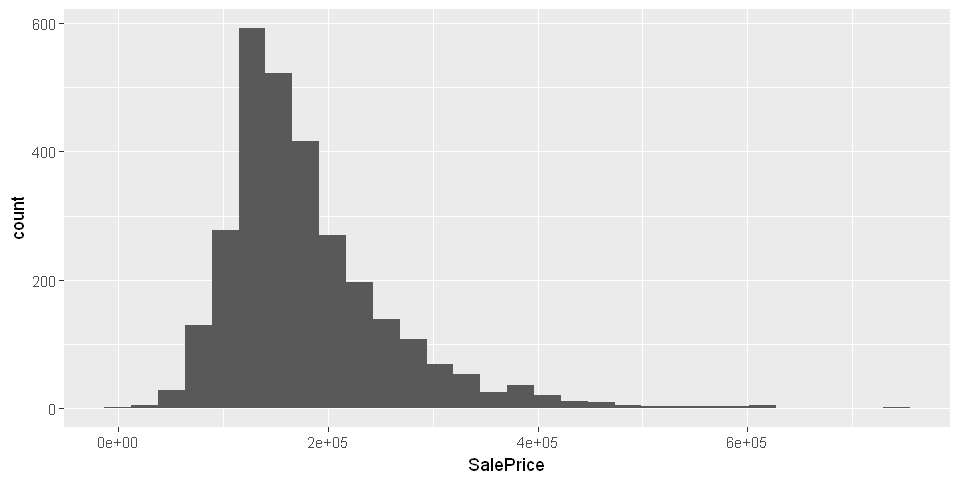

In [23]:
options(repr.plot.width=8, repr.plot.height=4)
ggplot(H,aes(SalePrice))+ geom_histogram()

¿ Es una distribución normal ?

**TODO:** investigar 5 minutos sobre los términos -> "skewness and kurtosis"

¿Qué son y cómo se interpretan?

----
----
----

Muchos de los modelos, usan como supuesto que las variables tienen una distribución normal (como vimos en los modelos lineales) por lo que siempre es favorable que las variables a utilizar sigan dicha distribución.

Existen muchas formas de hacer transformaciones en los datos para que sigan distribuciones especificas, en el caso de una distribución como la que sigue nuestra variable dependiente, simplemente podríamos aplicar un logaritmo:

`transformed_response <- log(H$SalePrice)`

Sin embargo, lo haremos de una forma más profesional, utilizaremos 'recetas', con la librería **recipes** , debemos pensar en el preprocesamiento como la creación de un plan para volver a aplicarlo estratégicamente, recipes no aplicará la transformación de facto, si no que iremos guardando los pasos a aplicar.

In [28]:
H_recipe <- recipe(SalePrice ~ ., data = H_train) %>%
  step_log(all_outcomes())
H_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         81

Steps:

Log transformation on all_outcomes()

# Lidiando con valores faltantes

La calidad de los datos es un tema importante para cualquier proyecto que implique el análisis de datos, y una de las preocupaciones de calidad de datos más comunes con las que se encontrarán es la falta de valores.

Los valores pueden faltar por muchas razones, sin embargo se pueden clasificar en dos tipos:

* **Falta informativa:** implica una causa estructural para el valor perdido que puede proporcionar información (deficiencias en la forma en que se recopilaron los datos o anormalidades en el entorno observacional)
* **Falta aleatoria:** implica que los valores faltantes ocurren independientemente del proceso de recopilación de datos

Dependiendo de la categoría, determinaremos cómo los manejaremos. Por ejemplo, podemos dar a los valores con falta informativa su propia categoría (por ejemplo,"None") ya que su valor afectar el rendimiento predictivo. 

Mientras que los valores que faltan al azar pueden merecer la eliminación o la **imputación** 

In [29]:
#contamos los valores faltantes
sum(is.na(H))

[1] 13960

¿ Cómo podemos saber si faltan aleatoriamente o de manera informativa ? 

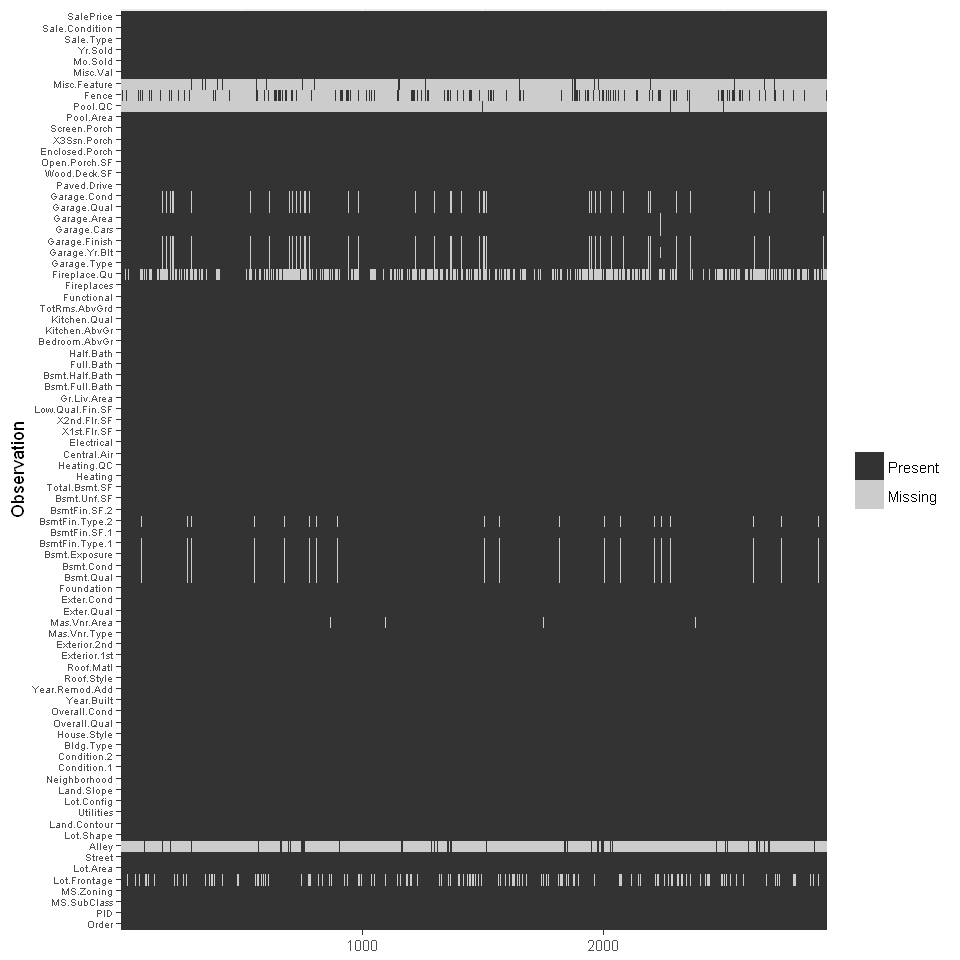

In [32]:
options(repr.plot.width=8, repr.plot.height=8)
H %>%
  is.na() %>%
  reshape2::melt() %>%
  ggplot(aes(Var2, Var1, fill=value)) + 
    geom_raster() + 
    coord_flip() +
    scale_y_continuous(NULL, expand = c(0, 0)) +
    scale_fill_grey(name = "", labels = c("Present", "Missing")) +
    xlab("Observation") +
    theme(axis.text.y  = element_text(size = 6))

Lo que ven aquí arriba es un **raster plot** , el cuál nos ayuda a observar la estructura de los datos faltantes, 

* ¿Cuáles son las variables con más datos faltantes ? 
* ¿Cualés creen que son datos faltantes informativos? 

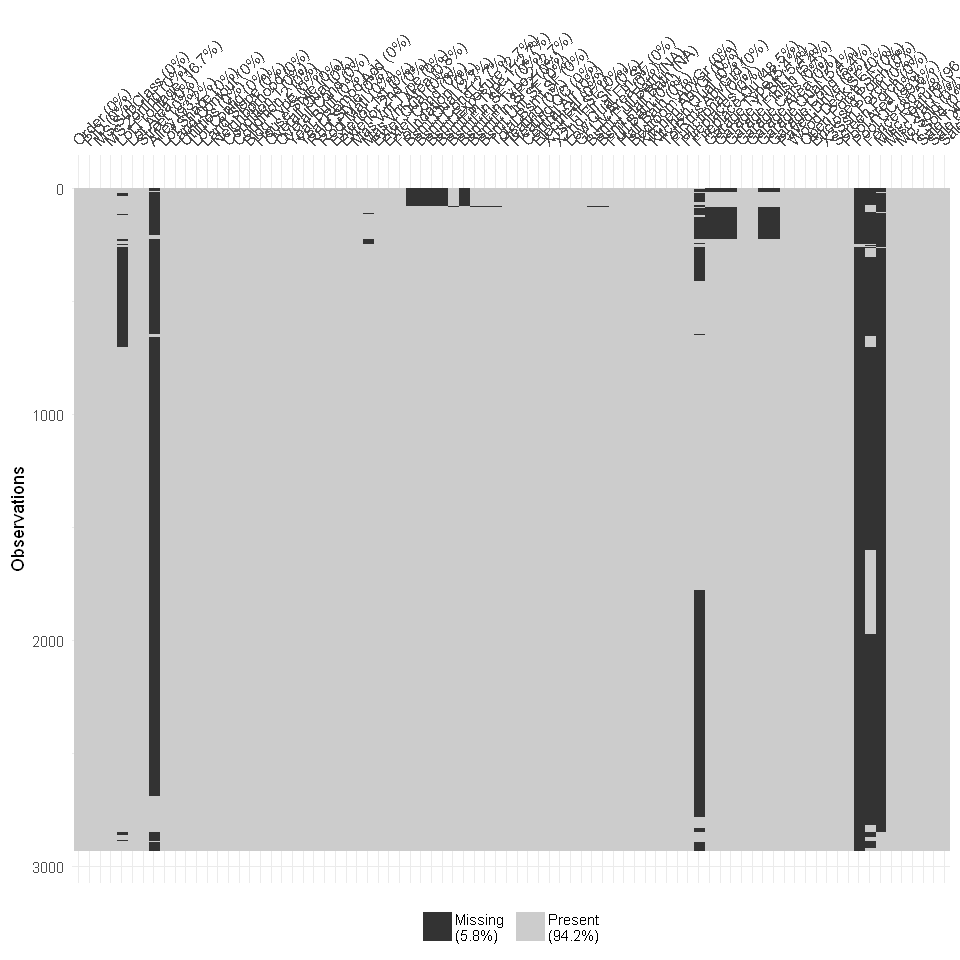

In [37]:
vis_miss(H, cluster = TRUE )

In [41]:
H %>% 
  filter(is.na(Garage.Type)) %>% 
      select(Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Qual,Garage.Cond,Garage.Cars,Garage.Area)

Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Qual,Garage.Cond,Garage.Cars,Garage.Area
NA,NA,NA,NA,NA,0,0
NA,NA,NA,NA,NA,0,0
NA,NA,NA,NA,NA,0,0
NA,NA,NA,NA,NA,0,0
NA,NA,NA,NA,NA,0,0
NA,NA,NA,NA,NA,0,0
NA,NA,NA,NA,NA,0,0
NA,NA,NA,NA,NA,0,0
NA,NA,NA,NA,NA,0,0
NA,NA,NA,NA,NA,0,0


Por ejemplo, podemos observar, que **Garage.Cars** y **Garage.Area** contienen el valor 0 siempre que las otras variables de **Garage.xx** tengan valores faltantes (es decir, un valor de NA). Esto podría deberse a que no tenían una forma de identificar casas sin garajes cuando los datos se recopilaron originalmente y, por lo tanto, todas las casas sin garaje se identificaron al no incluir nada. Dado que esta falta es informativa, sería apropiado imputar a NA un nuevo nivel de categoría (por ejemplo, "None") para estas variables de garaje.

# Inputación

La imputación es el proceso de reemplazar un valor faltante con una estimación. La imputación debe ser uno de los primeros pasos de ingeniería de características que realice, ya que afectará **todos** los procesos posteriores.

Existen varias formas de inputar, un enfoque elemental es calcular estadísticas descriptivas como la media, la mediana o el modo (para variables categóricas) y usar ese valor para reemplazar los NA. 

Aunque es computacionalmente eficiente, este enfoque no considera ningún otro atributo para una observación dada al imputar (por ejemplo, una paciente de 1.62m de alto puede tener su peso imputado de 80 Kg, ya que ese es el peso promedio en todas las observaciones que contiene 75% hombres que promedian una altura de 1.85)


In [42]:
H_recipe %>%
  step_knnimpute(all_predictors(), neighbors = 6)

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         81

Steps:

Log transformation on all_outcomes()
5-nearest neighbor imputation for all_predictors(), 6

# Filtrado de predictores

En muchos análisis de datos y proyectos de modelado, terminamos con cientos o incluso miles de atributos/predictores. Desde una perspectiva práctica, un modelo con más características a menudo se vuelve más difícil de interpretar y es costoso computacionalmente.

![no_informative](https://bradleyboehmke.github.io/HOML/03-engineering_files/figure-html/accuracy-comparison-1.png)

Aunque el rendimiento de algunos de nuestros modelos no se ve afectado significativamente por predictores no informativos, el tiempo para entrenar estos modelos puede verse afectado negativamente a medida que se agregan más:

![no_time](https://bradleyboehmke.github.io/HOML/03-engineering_files/figure-html/impact-on-time-1.png)

## Atributos sin varianza

Los atributos sin varianza, son los que podemos identificar como poco informativos, **zero-variance** son aquellos que solo tienen un valor, **near-zero variance** son aquellos que existe una observación dominante.

Cómo regla podemos identificar los atributos **near-zero variance** si:

* La fracción de valores únicos sobre en la muestra es baja (digamos $10$%)
* La relación entre la frecuencia del valor más frecuente y la frecuencia del segundo valor más frecuente es grande (digamos $20$%)

In [43]:
caret::nearZeroVar(H_train, saveMetrics= TRUE) %>% 
  rownames_to_column() %>% 
  filter(nzv)

rowname,freqRatio,percentUnique,zeroVar,nzv
Street,204.30000,0.09741841,FALSE,TRUE
Land.Contour,21.96429,0.19483682,FALSE,TRUE
Utilities,2051.00000,0.14612762,FALSE,TRUE
Land.Slope,22.17045,0.14612762,FALSE,TRUE
Condition.2,169.00000,0.34096444,FALSE,TRUE
Roof.Matl,126.43750,0.34096444,FALSE,TRUE
Bsmt.Cond,21.67857,0.29225524,FALSE,TRUE
BsmtFin.Type.2,24.16667,0.34096444,FALSE,TRUE
Heating,118.94118,0.29225524,FALSE,TRUE
Low.Qual.Fin.SF,505.50000,1.31514856,FALSE,TRUE


No tenemos predictores **zero-variance** pero tenos 21 **near-zero variance** !!!

# Ingeniería de carácteristicas numéricas

## Normalización
De manera similar al proceso discutido para normalizar las variables objetivo, los modelos paramétricos que tienen supuestos de distribución (por ejemplo, GLM) pueden beneficiarse al minimizar la asimetría de la distribución. 

Al normalizar muchas variables, es mejor usar los procedimientos Box-Cox (cuando los valores de las características son estrictamente positivos) o Yeo-Johnson (cuando los valores de las características no son estrictamente positivos) ya que estos métodos identificarán si se requiere una transformación y cuál es la transformación óptima si existe.

In [44]:
recipe(SalePrice ~ ., data = H_train) %>%
  step_YeoJohnson(all_numeric()) 

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         81

Steps:

Yeo-Johnson transformation on all_numeric()

## Estandarización

También debemos considerar la escala en la que se miden las características. ¿Cuáles son los valores más grandes y más pequeños en todas las características y abarcan varios órdenes de magnitud?

Las estandarización consiste en centrar y escalar para que las variables numéricas tengan $\mu = 0$ y $\sigma^2 = 1$ lo que proporciona una unidad de medida común comparable en todas las variables.

![Estandarization](https://bradleyboehmke.github.io/HOML/03-engineering_files/figure-html/standardizing-1.png)



In [45]:
H_recipe %>%
  step_center(all_numeric(), -all_outcomes()) %>%
  step_scale(all_numeric(), -all_outcomes())

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         81

Steps:

Log transformation on all_outcomes()
Centering for all_numeric(), -all_outcomes()
Scaling for all_numeric(), -all_outcomes()

# Ingeniería de carácteristicas categóricas

Algunas veces las características categóricas contendrán niveles que tienen muy pocas observaciones. Por ejemplo, hay 28 vecindarios únicos representados en los datos de vivienda de H, pero varios de ellos solo tienen unas pocas observaciones.

In [54]:
count(H_train, Neighborhood) %>% arrange(n)

Neighborhood,n
Landmrk,1
GrnHill,2
Blueste,4
Greens,5
Veenker,17
BrDale,18
Blmngtn,19
NPkVill,19
MeadowV,30
ClearCr,34


Incluso las características numéricas pueden tener distribuciones similares. Por ejemplo, Screen.Porch tiene 92% de valores registrados como cero (cero pies cuadrados que significa que no hay porche de pantalla) y el 8% restante tiene valores dispersos únicos

In [49]:
count(H_train, Screen.Porch) %>% arrange(Screen.Porch)

Screen.Porch,n
0,1876
40,1
88,1
90,2
92,1
99,1
100,3
108,1
109,1
110,2


A veces podemos beneficiarnos de colapsar en un número menor de categorías, este tipo de variables, En los ejemplos anteriores, es posible que queramos colapsar todos los niveles que se observan en menos del 10% de la muestra de entrenamiento en una categoría de "otros". Podemos usar `step_other()`.

In [51]:
# lump levels for two features
lumping <- recipe(SalePrice ~ ., data = H_train) %>%
  step_other(Neighborhood, threshold = .01, other = "other") %>%
   step_other(Screen.Porch, threshold = .1, other = ">0")

# apply this blue print --> you will learn about this at the end of the chapter
apply_2_training <- prep(lumping, training = H_train) %>%
  bake(H_train)

# new distribution of Neighborhood
count(apply_2_training, Neighborhood) %>% arrange(n)

# new distribution of Screen_Porch
count(apply_2_training, Screen.Porch) %>% arrange(n)


Neighborhood,n
MeadowV,30
ClearCr,34
StoneBr,38
SWISU,42
Timber,48
NoRidge,51
IDOTRR,65
Crawfor,74
Mitchel,78
BrkSide,82


Screen.Porch,n
>0,177
0,1876


# Variables indicadoras (One-Hot encoding)

Muchos modelos requieren que todas las variables predictoras sean numéricas. En consecuencia, necesitamos transformar  cualquier variable categórica en representaciones numéricas para que estos algoritmos puedan funcionar.

Podemos codificar con la función `step_dummy()`


In [55]:
recipe(SalePrice ~ ., data = H_train) %>%
  step_dummy(all_nominal(), one_hot = TRUE)

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         81

Steps:

Dummy variables from all_nominal(), TRUE

Un problema con esta codificación es que aumentará el tamaño de nuestro set de datos de forma exponencial...

También debemos tener cuidado con la codificación de características categóricas desordenadas porque la mayoría de los modelos las tratarán como características numéricas ordenadas. 

Si una característica categórica es ordenada, la codificación de etiquetas es una opción natural (más comúnmente conocida como codificación ordinal).

# Reducción de dimensionalidad

La reducción de dimensiones es un enfoque alternativo para filtrar características no informativas sin eliminarlas manualmente.

Es relativamente común incluir este tipo de enfoques de reducción de dimensiones durante el proceso de ingeniería de características. 

Por ejemplo, podemos desear reducir la dimensión de nuestras características con el análisis de componentes principales y retener el número de componentes necesarios para explicar, digamos, el 95% de la varianza y usar estos componentes como características en el modelado posterior.

In [60]:
recipe(SalePrice ~ ., data = H_train) %>%
  step_center(all_numeric()) %>%
  step_scale(all_numeric()) %>%
  step_pca(all_numeric(), threshold = .95)

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         81

Steps:

Centering for all_numeric()
Scaling for all_numeric()
PCA extraction with all_numeric()

<H1><center>Implementación completa</center></H1>

Habiamos dicho que en vez de hacer cosa por cosa, queríamos generar un plan, que se pueda aplicar de forma eficiente. 

Esto nos ayudará de dos formas:

* Pensar de forma secuencial
* Poder aplicarlo **dentro** del proceso de re-sampleo y evitar la *fuga de datos*


# Fuga de datos - *Data Leakage*


La fuga de datos es cuando se utiliza información externa al conjunto de datos de entrenamiento para crear el modelo. 

La fuga de datos a menudo ocurre durante el período de **preprocesamiento de datos**.

Para minimizar esto, la ingeniería de características debe hacerse de forma aislada de cada iteración de remuestreo.

El remuestreo nos permitirça estimar el **error de predicción generalizable**. 

Por lo tanto, debemos aplicar nuestro plan de ingeniería de características a cada remuestreo de forma independiente.

![leak](https://bradleyboehmke.github.io/HOML/images/minimize-leakage.png)

**Por ejemplo** al estandarizar las características numéricas, cada información de entrenamiento muestreada debe usar sus propias estimaciones de media y varianza y estos valores específicos deben aplicarse al mismo conjunto de prueba remuestreado. 

Esto imita cómo se produce la predicción en la vida real cuando solo conocemos las estimaciones de media y varianza de nuestros datos actuales.

# RECETA COMPLETA:

In [90]:
H_no_random <- H %>%
    dplyr::select(c(-Order,-PID,-Alley,-Pool.QC,-Fence,-Misc.Feature,-MS.SubClass))

In [91]:
set.seed(123)
index <- createDataPartition(H_no_random$SalePrice, p = 0.7, list = FALSE)
H_train <- as.tibble(H_no_random[index,])
H_test <- as.tibble(H_no_random[-index,])

In [92]:
receta <- recipe(SalePrice ~ ., data = H_train) %>%
        step_nzv(all_nominal()) %>%
        step_knnimpute(all_predictors(), neighbors = 6) %>% # inputación
        step_center(all_numeric(), -all_outcomes()) %>% 
        step_scale(all_numeric(), -all_outcomes())  #normalización, estandarización y escalado
receta

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         74

Steps:

Sparse, unbalanced variable filter on all_nominal()
5-nearest neighbor imputation for all_predictors(), 6
Centering for all_numeric(), -all_outcomes()
Scaling for all_numeric(), -all_outcomes()

In [93]:
preparado <- prep(receta, training = H_train)

In [94]:
H_train <- bake(preparado, newdata = H_train)
H_test <- bake(preparado, newdata = H_test)
head(H_train)
dim(H_train)

MS.Zoning,Lot.Frontage,Lot.Area,Lot.Shape,Lot.Config,Neighborhood,Condition.1,Bldg.Type,House.Style,Overall.Qual,...,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
RL,3.1210598,2.48080779,IR1,Corner,NAmes,Norm,1Fam,1Story,-0.05180742,...,-0.3729175,-0.1014104,-0.2827562,-0.06646233,-0.105698,-0.4534720,1.677542,WD,Normal,215000
RH,0.4604397,0.16883048,Reg,Inside,NAmes,Feedr,1Fam,1Story,-0.75618251,...,-0.3729175,-0.1014104,1.8023675,-0.06646233,-0.105698,-0.0872336,1.677542,WD,Normal,105000
RL,0.5040564,0.47234349,IR1,Corner,NAmes,Norm,1Fam,1Story,-0.05180742,...,-0.3729175,-0.1014104,-0.2827562,-0.06646233,31.237544,-0.0872336,1.677542,WD,Normal,172000
RL,1.0274571,0.11581611,Reg,Corner,NAmes,Norm,1Fam,1Story,0.65256767,...,-0.3729175,-0.1014104,-0.2827562,-0.06646233,-0.105698,-0.8197104,1.677542,WD,Normal,244000
RL,0.1987394,0.42219786,IR1,Inside,Gilbert,Norm,1Fam,2Story,-0.75618251,...,-0.3729175,-0.1014104,-0.2827562,-0.06646233,-0.105698,-1.1859488,1.677542,WD,Normal,189900
RL,0.3732063,-0.01981805,IR1,Inside,Gilbert,Norm,1Fam,2Story,-0.05180742,...,-0.3729175,-0.1014104,-0.2827562,-0.06646233,-0.105698,-0.0872336,1.677542,WD,Normal,195500


[1] 2053   63

In [126]:
dmy <- dummyVars(" ~ .", data = H_train)
Htrain_clean <- na.omit(data.frame(predict(dmy, newdata = H_train)))
Htest_clean <- na.omit(data.frame(predict(dmy, newdata = H_test)))
head(Htrain_clean)


MS.Zoning.A..agr.,MS.Zoning.C..all.,MS.Zoning.FV,MS.Zoning.I..all.,MS.Zoning.RH,MS.Zoning.RL,MS.Zoning.RM,Lot.Frontage,Lot.Area,Lot.Shape.IR1,...,Sale.Type.Oth,Sale.Type.VWD,Sale.Type.WD.,Sale.Condition.Abnorml,Sale.Condition.AdjLand,Sale.Condition.Alloca,Sale.Condition.Family,Sale.Condition.Normal,Sale.Condition.Partial,SalePrice
0,0,0,0,0,1,0,3.1210598,2.48080779,1,...,0,0,1,0,0,0,0,1,0,215000
0,0,0,0,1,0,0,0.4604397,0.16883048,0,...,0,0,1,0,0,0,0,1,0,105000
0,0,0,0,0,1,0,0.5040564,0.47234349,1,...,0,0,1,0,0,0,0,1,0,172000
0,0,0,0,0,1,0,1.0274571,0.11581611,0,...,0,0,1,0,0,0,0,1,0,244000
0,0,0,0,0,1,0,0.1987394,0.42219786,1,...,0,0,1,0,0,0,0,1,0,189900
0,0,0,0,0,1,0,0.3732063,-0.01981805,1,...,0,0,1,0,0,0,0,1,0,195500


In [96]:
head(Htest_clean)

MS.Zoning.A..agr.,MS.Zoning.C..all.,MS.Zoning.FV,MS.Zoning.I..all.,MS.Zoning.RH,MS.Zoning.RL,MS.Zoning.RM,Lot.Frontage,Lot.Area,Lot.Shape.IR1,...,Sale.Type.Oth,Sale.Type.VWD,Sale.Type.WD.,Sale.Condition.Abnorml,Sale.Condition.AdjLand,Sale.Condition.Alloca,Sale.Condition.Family,Sale.Condition.Normal,Sale.Condition.Partial,SalePrice
0,0,0,0,0,1,0,-1.1533790,-0.59046840,1,...,0,0,1,0,0,0,0,1,0,191500
0,0,0,0,0,1,0,0.2423561,-0.01729356,1,...,0,0,1,0,0,0,0,1,0,175900
0,0,0,0,0,1,0,-0.2810446,-0.20066361,1,...,0,0,1,0,0,0,0,1,0,180400
0,0,0,0,0,1,0,3.6008438,0.22758234,1,...,0,0,1,0,0,0,0,1,0,164000
0,0,0,0,0,1,0,0.8093735,0.14266755,0,...,0,0,0,0,0,0,0,0,1,394432
0,0,0,0,0,1,0,-0.1065777,0.27382647,1,...,0,0,1,0,0,0,0,1,0,149900


In [97]:
# create a resampling method
cv <- trainControl(
  method = "repeatedcv", 
  number = 10, 
  repeats = 5
  )

# create a hyperparameter grid search
hyper_grid <- expand.grid(k = seq(2, 25, by = 1))


In [100]:
knn_fit2 <- train(SalePrice ~ .,
  data = Htrain_clean, 
  method = "knn", 
  trControl = cv, 
  tuneGrid = hyper_grid,
  na.action=na.exclude,
  metric = "RMSE"
  )

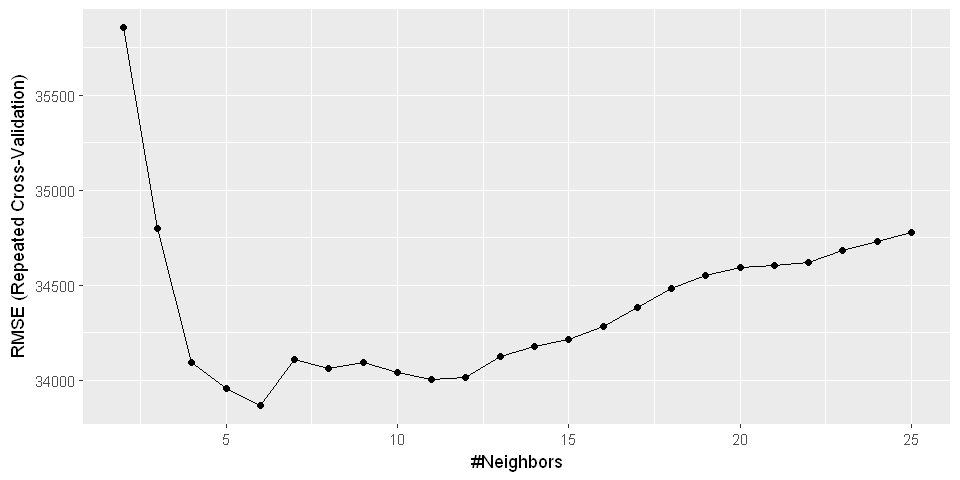

In [102]:
options(repr.plot.width=8, repr.plot.height=4)
ggplot(knn_fit2)

# Refresher de ayer...

<h1><center>Regresión lineal</center></h1>

Toda la teoría de esto ya la saben.... :P 

![vdd](https://i.ytimg.com/vi/manWsQ69cms/hqdefault.jpg)

haremos tres modelos y compararémos, además de agregar algunas funciones no mencionadas ayer :)

In [105]:
model1 <- lm(SalePrice ~ Gr.Liv.Area, data = Htrain_clean)
model2 <- lm(SalePrice ~ Gr.Liv.Area + Year.Built, data = Htrain_clean)
model3 <- lm(SalePrice ~ ., data = Htrain_clean) 

In [131]:
set.seed(123)  # for reproducibility
cv_model1 <- train(
  form = SalePrice ~ Gr.Liv.Area, 
  data = Htrain_clean, 
  method = "lm",
  na.action=na.exclude,
  trControl = trainControl(method = "cv", number = 10)
)

set.seed(123)
cv_model2 <- train(
  SalePrice ~ Gr.Liv.Area + Year.Built, 
  data = Htrain_clean, 
  method = "lm",
  na.action=na.exclude,
  trControl = trainControl(method = "cv", number = 10)
)

# model 3 CV
set.seed(123)
cv_model3 <- train(
  SalePrice ~ ., 
  data = Htrain_clean, 
  method = "lm",
  na.action=na.exclude,
  trControl = trainControl(method = "cv", number = 10)
)

# Extract out of sample performance measures
summary(resamples(list(
  model1 = cv_model1, 
  model2 = cv_model2, 
  model3 = cv_model3
)))

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdat


Call:
summary.resamples(object = resamples(list(model1 = cv_model1, model2
 = cv_model2, model3 = cv_model3)))

Models: model1, model2, model3 
Number of resamples: 10 

MAE 
           Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
model1 33802.43 37669.47 39190.56 38582.17 39344.38 41681.86    0
model2 27774.00 31077.31 32282.27 31693.30 33115.76 33869.12    0
model3 15764.83 16328.75 17229.39 17561.29 18747.83 19531.97    0

RMSE 
           Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
model1 44384.35 54264.87 55748.06 56035.32 57871.06 67301.49    0
model2 36639.98 42684.31 46359.52 46394.81 49954.60 57893.89    0
model3 21918.25 24300.42 24950.05 29422.84 31598.58 50799.52    0

Rsquared 
            Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
model1 0.3714322 0.4946891 0.5203762 0.5195885 0.5812635 0.5987003    0
model2 0.5302812 0.6420152 0.6706676 0.6701103 0.7238419 0.7448654    0
model3 0.6866625 0.8532648 0.8950746 0.8663842 0.9069836 0.922

In [128]:
Prediccion = predict(cv_model3,Htest_clean)[1]

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"

In [129]:
Real = Htest_clean$SalePrice[1]

ErrorTotal = Real - Prediccion
ErrorTotal

1 
-16254.62

# Otros modelos de ML: Regresión Logística

Este tema es una pequeña variación a la regresión lineal...

Una de las principales aplicaciones de la regresión logística es la de clasificación binaria, en el que las observaciones se clasifican en un grupo u otro dependiendo del valor que tome la variable empleada como predictor.

¿Por qué la regresión lineal no juega en este tema?

Nuestra tarea es mapear $x_1,x_2,...x_n$ a $Y[0,1]$

Si nosotros quisieramos ajustar el modelo:

$$
Y = \beta_0 + \beta1 X
$$

Obtendríamos valores fuera del rango $[0,1]$ dicho rango por cierto, represeta una probabilidad (razón de probabilidades, específicamente).


![logit](https://bradleyboehmke.github.io/HOML/05-logistic-regression_files/figure-html/whylogit-1.png)


Dada la situación, tenemos que hacer una transformación para que nos aseguremos que en efecto la salida no salga del rango permitido.

Por lo que usaremos la transformación sigmoide:

$$
\text{función sigmoide}  = \dfrac{1}{1 + e^{-x}} \tag{1}
$$

De tal manera que:

$$
P(Y=I|X = x)= \frac{1}{1+e^{-(\beta_0+\beta_1X)}} = \frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}
$$

Donde $P(Y=I|X = x)$ se puede interpretar como la probabilidad de que la variable cualitativa Y adquiera el valor I (el nivel de referencia, codificado como 1), dado que el predictor X tiene el valor x.

Y se puede extender tal como la regresión lineal simple a $x_1,x_2,....,x_n$


Por lo que despejando para $\beta_0+\beta_1X$:

$$
ln(\frac{p(Y=I|X = x)}{1-p(Y=I|X = x)})=\beta_0+\beta_1X
$$

Esa razón de probabilidades, se le conoce como **log ODDs**

# Intuición detrás de ODDS RATIO

Imagine el caso hipotético en el que sabe que un evento sucede $P(Y=1)$ con una probabilidad (p) de $0.6$ por lo tanto la probabilidad (q) de que dicho evento no suceda $P(Y=0)$  es de $0.4$, dicho esto el ratio de probabilidades (ODDS RATIO) es igual a:

$$
\frac{p}{q} = 3
$$

Lo que equivale a decir que se espera 3 eventos $Y = 1$ por cada evento $Y = 0$

En la regresión logística, $\beta_1$ indica el cambio en el logaritmo de ODDs (Y) debido al incremento de una unidad de X, o lo que es lo mismo, multiplica los ODDs por $e^{\beta_1}$

# Predicción:

$$
\hat{p}(Y=1|X)=\frac{e^{\hat{\beta_0}+\hat{\beta_1}X}}{1+e^{\hat{\beta_0}+\hat{\beta_1}X}} 
$$

In [2]:
diabetes <- read.csv(file.choose())

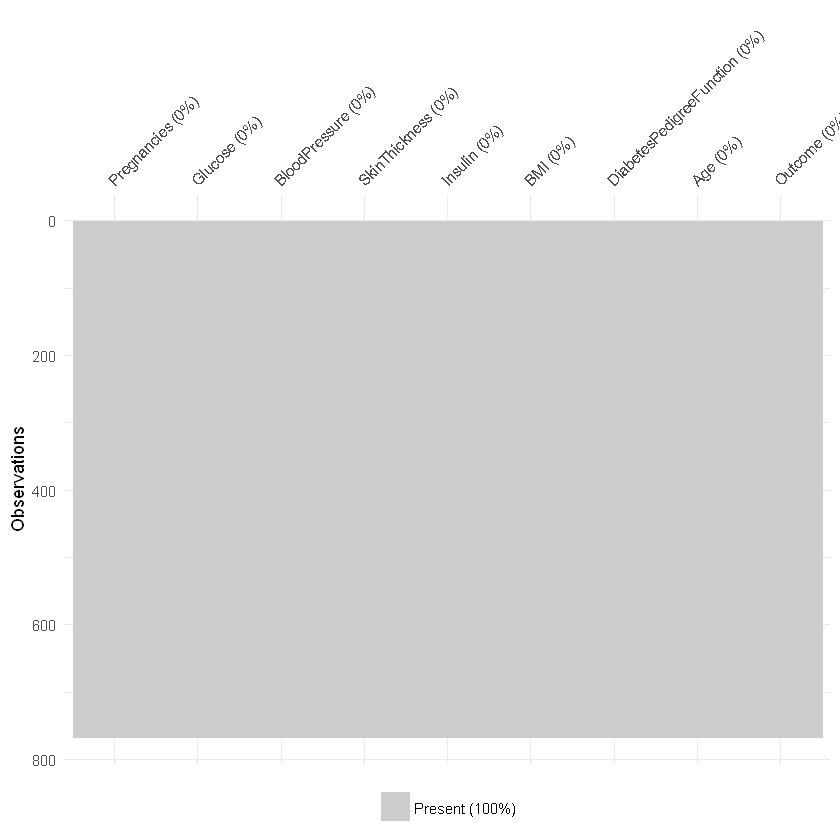

In [3]:
vis_miss(diabetes, cluster = TRUE )

**Siempre es bueno dar un segundo vistazo cuando todo se ve demasiado bonito...**

In [4]:
summary(diabetes)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [3]:
dim(diabetes)

[1] 768   9

In [4]:
diabetes_wo0s <- diabetes %>%
    subset((Glucose!=0) & (BloodPressure!=0) & (BMI!=0))

In [5]:
dim(diabetes_wo0s)

[1] 724   9

In [6]:
set.seed(123)
index <- createDataPartition(diabetes_wo0s$Outcome, p = 0.7, list = FALSE)
d_train <- as_tibble(diabetes_wo0s[index,])
d_test <- as_tibble(diabetes_wo0s[-index,])

In [27]:
model <- glm(Outcome ~Glucose , family = "binomial", data = d_train)
summary(model)


Call:
glm(formula = Outcome ~ Glucose, family = "binomial", data = d_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0609  -0.7725  -0.5056   0.7919   2.3128  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.777786   0.538174 -10.736   <2e-16 ***
Glucose      0.040701   0.004121   9.876   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 652.14  on 506  degrees of freedom
Residual deviance: 517.30  on 505  degrees of freedom
AIC: 521.3

Number of Fisher Scoring iterations: 4


In [28]:
model2 <- glm(Outcome ~ Pregnancies + Glucose + BMI + DiabetesPedigreeFunction , family = "binomial", data = d_train)
summary(model2)


Call:
glm(formula = Outcome ~ Pregnancies + Glucose + BMI + DiabetesPedigreeFunction, 
    family = "binomial", data = d_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5627  -0.6991  -0.4085   0.6684   2.4595  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.837437   0.845069 -10.458  < 2e-16 ***
Pregnancies               0.172723   0.033854   5.102 3.36e-07 ***
Glucose                   0.036582   0.004281   8.546  < 2e-16 ***
BMI                       0.072786   0.018417   3.952 7.74e-05 ***
DiabetesPedigreeFunction  0.946255   0.379293   2.495   0.0126 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 652.14  on 506  degrees of freedom
Residual deviance: 465.83  on 502  degrees of freedom
AIC: 475.83

Number of Fisher Scoring iterations: 5


In [29]:
exp(coef(model2))

(Intercept)              Pregnancies                  Glucose 
            0.0001451944             1.1885366711             1.0372591938 
                     BMI DiabetesPedigreeFunction 
            1.0755004142             2.5760430948

In [30]:
exp(confint(model2))

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),0.0000256764,0.0007098104
Pregnancies,1.1132963364,1.2716683259
Glucose,1.0288690399,1.0463178561
BMI,1.0379795263,1.1158697377
DiabetesPedigreeFunction,1.2355426351,5.4817350374


In [31]:
d_train$Outcome <- as.factor(d_train$Outcome)
d_test$Outcome <- as.factor(d_test$Outcome)
set.seed(123)
cv_model1 <- train(
  Outcome ~ Glucose, 
  data = d_train, 
  method = "glm",
  family = "binomial",
  trControl = trainControl(method = "cv", number = 10)
)

set.seed(123)
cv_model2 <- train(
  Outcome ~ Pregnancies + Glucose + BMI + DiabetesPedigreeFunction, 
  data = d_train, 
  method = "glm",
  family = "binomial",
  trControl = trainControl(method = "cv", number = 10)
)

summary(
  resamples(
    list(
      model1 = cv_model1, 
      model2 = cv_model2
    )
  )
)$statistics$Accuracy


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,NA's
model1,0.6666667,0.7186538,0.7647059,0.7596078,0.7863462,0.86,0
model2,0.7058824,0.7611765,0.7800000,0.7772624,0.8028846,0.86,0


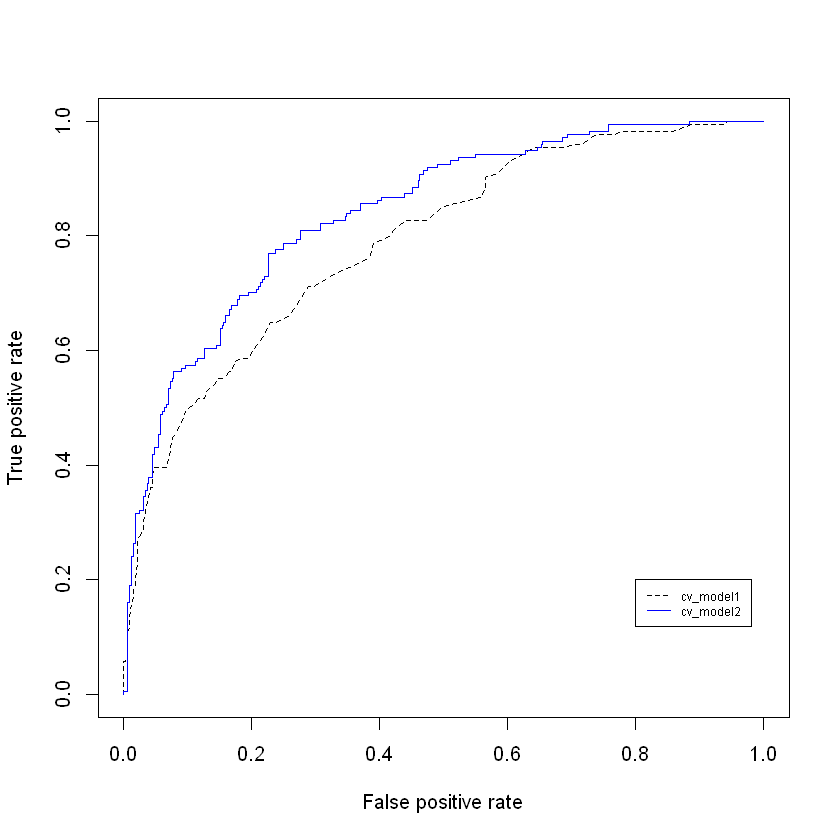

In [49]:
m1_prob <- predict(cv_model1, d_train, type = "prob")[2]
m2_prob <- predict(cv_model2, d_train, type = "prob")[2]


perf1 <- prediction(m1_prob, d_train$Outcome) %>%
  performance(measure = "tpr", x.measure = "fpr")
perf2 <- prediction(m2_prob, d_train$Outcome) %>%
  performance(measure = "tpr", x.measure = "fpr")

# Plot ROC curves for cv_model1 and cv_model3
plot(perf1, col = "black", lty = 2)
plot(perf2, add = TRUE, col = "blue")
legend(0.8, 0.2, legend = c("cv_model1", "cv_model2"),
       col = c("black", "blue"), lty = 2:1, cex = 0.6)

Alguien me ayuda a explicar ésta gráfica? 

TODO: 5 min buscando que es una curva ROC

In [50]:
pred_class <- predict(cv_model2, d_train)

# create confusion matrix
confusionMatrix(
  data = relevel(pred_class, ref = "1"), 
  reference = relevel(d_train$Outcome, ref = "1")
)

Confusion Matrix and Statistics

          Reference
Prediction   1   0
         1 100  34
         0  74 299
                                          
               Accuracy : 0.787           
                 95% CI : (0.7487, 0.8218)
    No Information Rate : 0.6568          
    P-Value [Acc > NIR] : 9.612e-11       
                                          
                  Kappa : 0.5001          
 Mcnemar's Test P-Value : 0.0001749       
                                          
            Sensitivity : 0.5747          
            Specificity : 0.8979          
         Pos Pred Value : 0.7463          
         Neg Pred Value : 0.8016          
             Prevalence : 0.3432          
         Detection Rate : 0.1972          
   Detection Prevalence : 0.2643          
      Balanced Accuracy : 0.7363          
                                          
       'Positive' Class : 1               
                                          

In [52]:
pred_class_test <- predict(cv_model2, d_test)

# create confusion matrix
confusionMatrix(
  data = relevel(pred_class_test, ref = "1"), 
  reference = relevel(d_test$Outcome, ref = "1")
)

Confusion Matrix and Statistics

          Reference
Prediction   1   0
         1  40  21
         0  35 121
                                          
               Accuracy : 0.7419          
                 95% CI : (0.6783, 0.7988)
    No Information Rate : 0.6544          
    P-Value [Acc > NIR] : 0.003529        
                                          
                  Kappa : 0.4032          
 Mcnemar's Test P-Value : 0.082352        
                                          
            Sensitivity : 0.5333          
            Specificity : 0.8521          
         Pos Pred Value : 0.6557          
         Neg Pred Value : 0.7756          
             Prevalence : 0.3456          
         Detection Rate : 0.1843          
   Detection Prevalence : 0.2811          
      Balanced Accuracy : 0.6927          
                                          
       'Positive' Class : 1               
                                          

<h1><center>¿Por qué Miguel está tan obsesionado con los modelos lineales?</center></h1>

La realidad es que muchísimos modelos que usamos actualmente, son derivaciones de modelos lineales, usan en algún punto modelos lineales, y cómo lo vieron en la clase de estadística, también mucho de esa disciplina está fundada en ellos.

Las famosas **redes neuronales** NO son la excepción

Básicamente difieren en dos cosas:

* Diferente de una regresión lineal donde múltiples variables de entrada explicarán un resultado. En una red neuronal, se probarán múltiples variables de entrada y se combinarán varias veces para explicar uno o más resultados.

* Las redes neuronales aprenderán descubriendo que se equivocaron y luego trabajando hacia atrás en el algoritmo para descubrir qué valores y conexiones hicieron que la salida fuera incorrecta

![ANN](https://miro.medium.com/max/700/1*XPThP6QC5VkeG3VzI0FhIQ.png)

---
---
---

Reducimos el error optimizando la función de costo:

![costo](https://ml-cheatsheet.readthedocs.io/en/latest/_images/gradient_descent_demystified.png)

In [7]:
library(keras)

In [8]:
X_train <- d_train %>% 
  select(-Outcome) %>%
  scale() 

Y_train <- to_categorical(d_train$Outcome)

In [9]:
X_train <- d_test %>% 
  select(-Outcome) %>%
  scale()

Y_test <- to_categorical(d_test$Outcome)

In [10]:
model <- keras_model_sequential() 

model %>% 
  layer_dense(units = 8, activation = 'relu', input_shape = ncol(X_train)) %>% 
  layer_dropout(rate = 0.4) %>% 
  layer_dense(units = 8, activation = 'relu') %>%
  layer_dropout(rate = 0.3) %>%
  layer_dense(units = 2, activation = 'sigmoid')

model <- model %>% compile(
  loss = 'binary_crossentropy',
  optimizer = 'adam',
  metrics = c('accuracy')
)


model %>% summary()

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 8)                       72          
________________________________________________________________________________
dropout (Dropout)                   (None, 8)                       0           
________________________________________________________________________________
dense_1 (Dense)                     (None, 8)                       72          
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 8)                       0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 2)                       18          
Total params: 162
Trainable params: 162
Non-trainable params: 0
_____________________________________________

In [ ]:
epochs <- 100

# Fit the model and store training stats
history <- model %>% keras::fit(
  X_train, Y_train, 
  epochs = epochs,
  validation_split = 0.2,
)

plot(history, metrics = "loss", smooth = FALSE) +
  coord_cartesian(xlim = c(0, 150), ylim = c(0, 5))

# HACER EL FIT DEL MODELO MATA EL KERNEL :(

# TODO: FINAL PROJECT

Trabajarán con un dataset real de casos de tuberculosis por la organización mundial de la salud, y haremos un proyecto end-to-end de ML.

El dataset es un reto, así que van algunos hints:

* La primer pregunta para poder explotar **R** es si el dataset es tidy.
* Si existen redundancias identifíquelas
* ¿Existen nombres de variables que contienen información?
* **HINT 1:** utilize la función ``gather()`` entre las variables new_sp_m014:newrel_f65, utilize key = "key" y value = "cases" ( vaya a la documentación para ver como se utiliza la función en caso de tener dudas)
* **HINT 2:** la variable **key** que se generó por el HINT 1, debería tener una estructura como: *new_ep_f014**:
 * Las tres primeras letras indican si el caso es nuevo o viejo
 * Las siguientes dos indican:
  * rel: recaída
  * ep: TB extrapulmonar
  * sn: TB frotis negativo
  * sp: TB frotis positivo
 * La siguiente letra m/f codifica el genero
 * Los números codifican los bins de edad:
  * 014: 0 - 14 años
  * 1524: 15 - 24 años
  * .....
* **HINT 3:** identifique la inconsistencia en las etiquetas, utilize ``stringr::str_replace(key,...,...)`` para hacer consistente todo el codificado, se deberá utilizar en conjunto con `mutate(key = )` para hacer asignación *inplace*
* **HINT 4:** utilize `separate()` para generar tres nuevas columnas : new , type, sexage vea cual es el separador a utilzar...
* **HINT 5:** utilize `tidyr:select(c(-,-,-))` para eliminar las columnas que no aportan información
* **HINT 5:** vuelva a utilizar `separate()` para generar dos columnas: sex, age vea cual es el separador a utilizar
* **HINT 6:** vea si todas las variables son del tipo que deberían ser, `str()` puede ser util

Una vez hecho esto, (para la siguiente sección funciones como `subset()`, `group_by()`, `summarize()`, `sum()`, `n()`, entre otras... pueden ser utiles)

* gráfique la serie de tiempo de los casos de tuberculosis para México
* ¿existen diferencias significativas entre los casos de cada tipo de tuberculosis en México?
* gráfique la serie de tiempo de los casos de tuberculosis para México vs EUA
* cuente los casos por bin de años de individuo, grafíque en barras los mismos, cual es el bin con más casos en México
* cuente los casos por año en México, ¿cual es el año con más casos?
* genere un modelo de regresión lineal y  con variable independientes sex, age para estimar cases


In [9]:
who <- tidyr::who